In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid', color_codes = True, font_scale = 2)
from sklearn.ensemble import RandomForestRegressor

C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
trainset = pd.read_csv('C:/Users/srisravana.p/Documents/Python_Code/GitHub/Train.csv')
testset = pd.read_csv('C:/Users/srisravana.p/Documents/Python_Code/GitHub/Test.csv')

In [3]:
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 81 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1200 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            91 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-n

In [5]:
trainset['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
185000    10
180000    10
144000    10
175000     9
147000     9
100000     9
127000     9
165000     8
176000     8
170000     8
129000     8
230000     8
250000     8
200000     8
141000     8
215000     8
148000     7
173000     7
          ..
64500      1
326000     1
277500     1
259000     1
254900     1
131400     1
181134     1
142953     1
245350     1
121600     1
337500     1
228950     1
274000     1
317000     1
154500     1
52000      1
107400     1
218000     1
104000     1
68500      1
94000      1
466500     1
410000     1
437154     1
219210     1
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 662, dtype: int64

In [6]:
trainset.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [7]:
trainset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1200.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1451.00000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.000000,56.922550,70.045833,10517.225497,6.100069,5.575051,1971.272104,1984.879369,103.75672,443.374914,...,93.804661,46.645648,21.969157,3.411926,15.071282,2.760795,43.518849,6.322138,2007.815627,180944.102810
std,421.321334,42.304033,24.294456,9984.675721,1.383171,1.113125,30.212814,20.645927,181.10815,456.142186,...,124.249421,66.276387,61.137400,29.327247,55.775138,40.191018,496.291826,2.704540,1.328542,79464.918335
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,59.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.00000,383.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,80.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1459.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


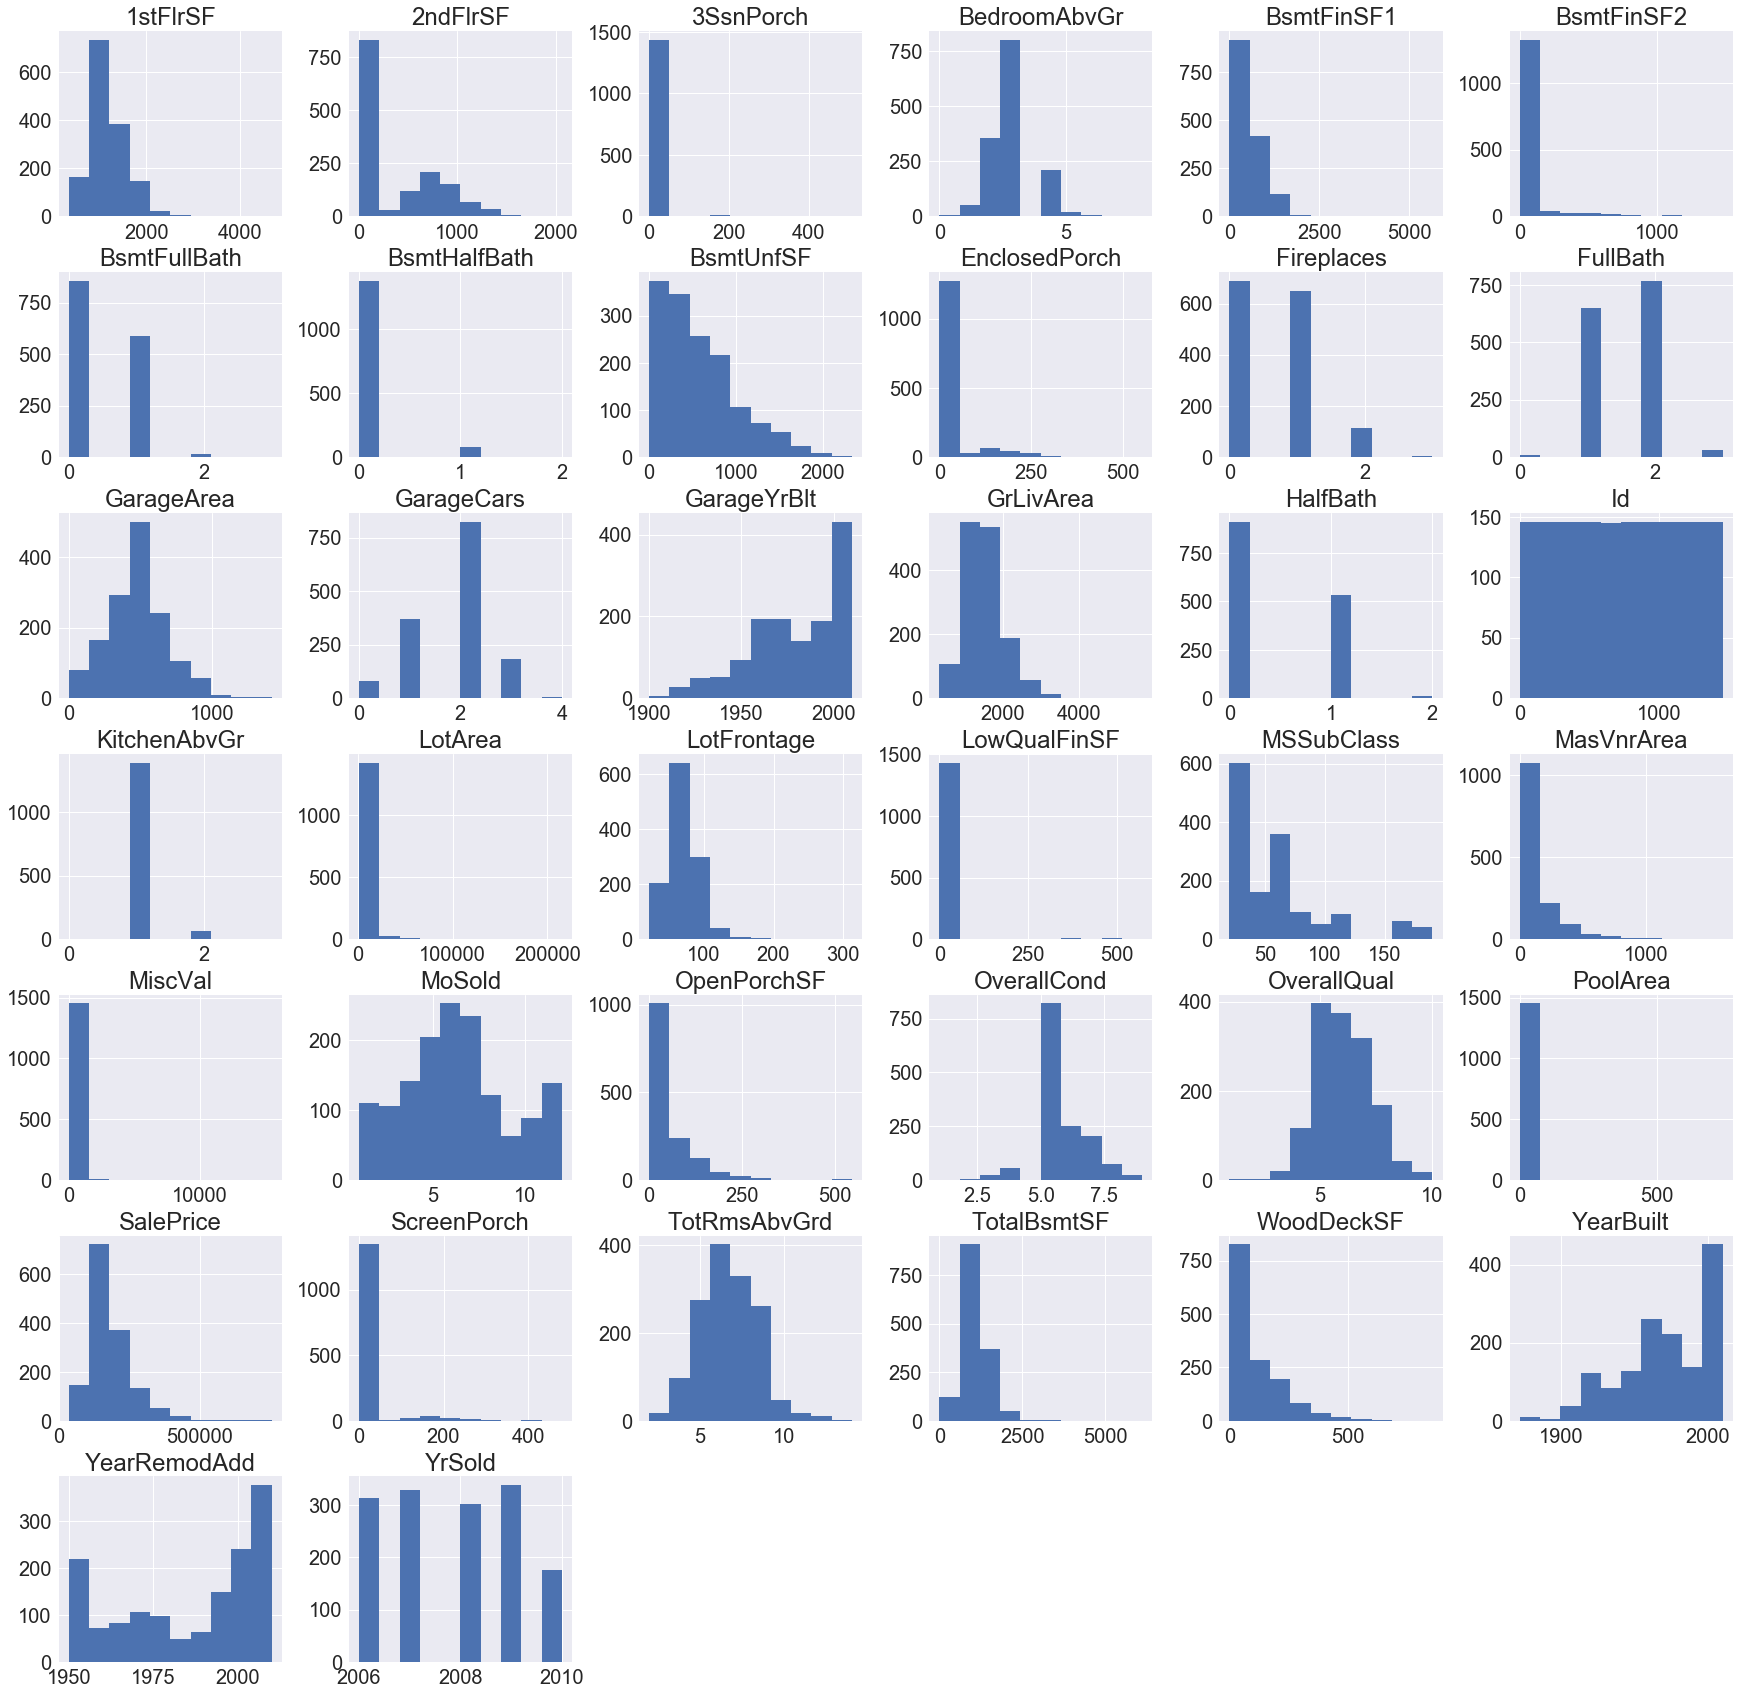

In [8]:
trainset.hist(bins = 10, figsize = (30,30))
plt.show()

In [9]:
# Let's use correlation matrix to know important variable
trainset.corr()[trainset.corr() > 0.5]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572342,0.550453,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790972
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572342,NaN,1.000000,0.592915,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522877
YearRemodAdd,NaN,NaN,NaN,NaN,0.550453,NaN,0.592915,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507015
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
corr = trainset.corr()['SalePrice']
corr[np.argsort(corr, axis = 0)[:15:-1]]

SalePrice       1.000000
OverallQual     0.790972
GrLivArea       0.708584
GarageCars      0.640383
GarageArea      0.623385
TotalBsmtSF     0.613792
1stFlrSF        0.605971
FullBath        0.560604
TotRmsAbvGrd    0.533682
YearBuilt       0.522877
YearRemodAdd    0.507015
GarageYrBlt     0.486264
MasVnrArea      0.477411
Fireplaces      0.466828
BsmtFinSF1      0.386783
LotFrontage     0.351896
WoodDeckSF      0.328881
2ndFlrSF        0.319193
OpenPorchSF     0.315980
HalfBath        0.284626
LotArea         0.263843
BsmtFullBath    0.227551
Name: SalePrice, dtype: float64

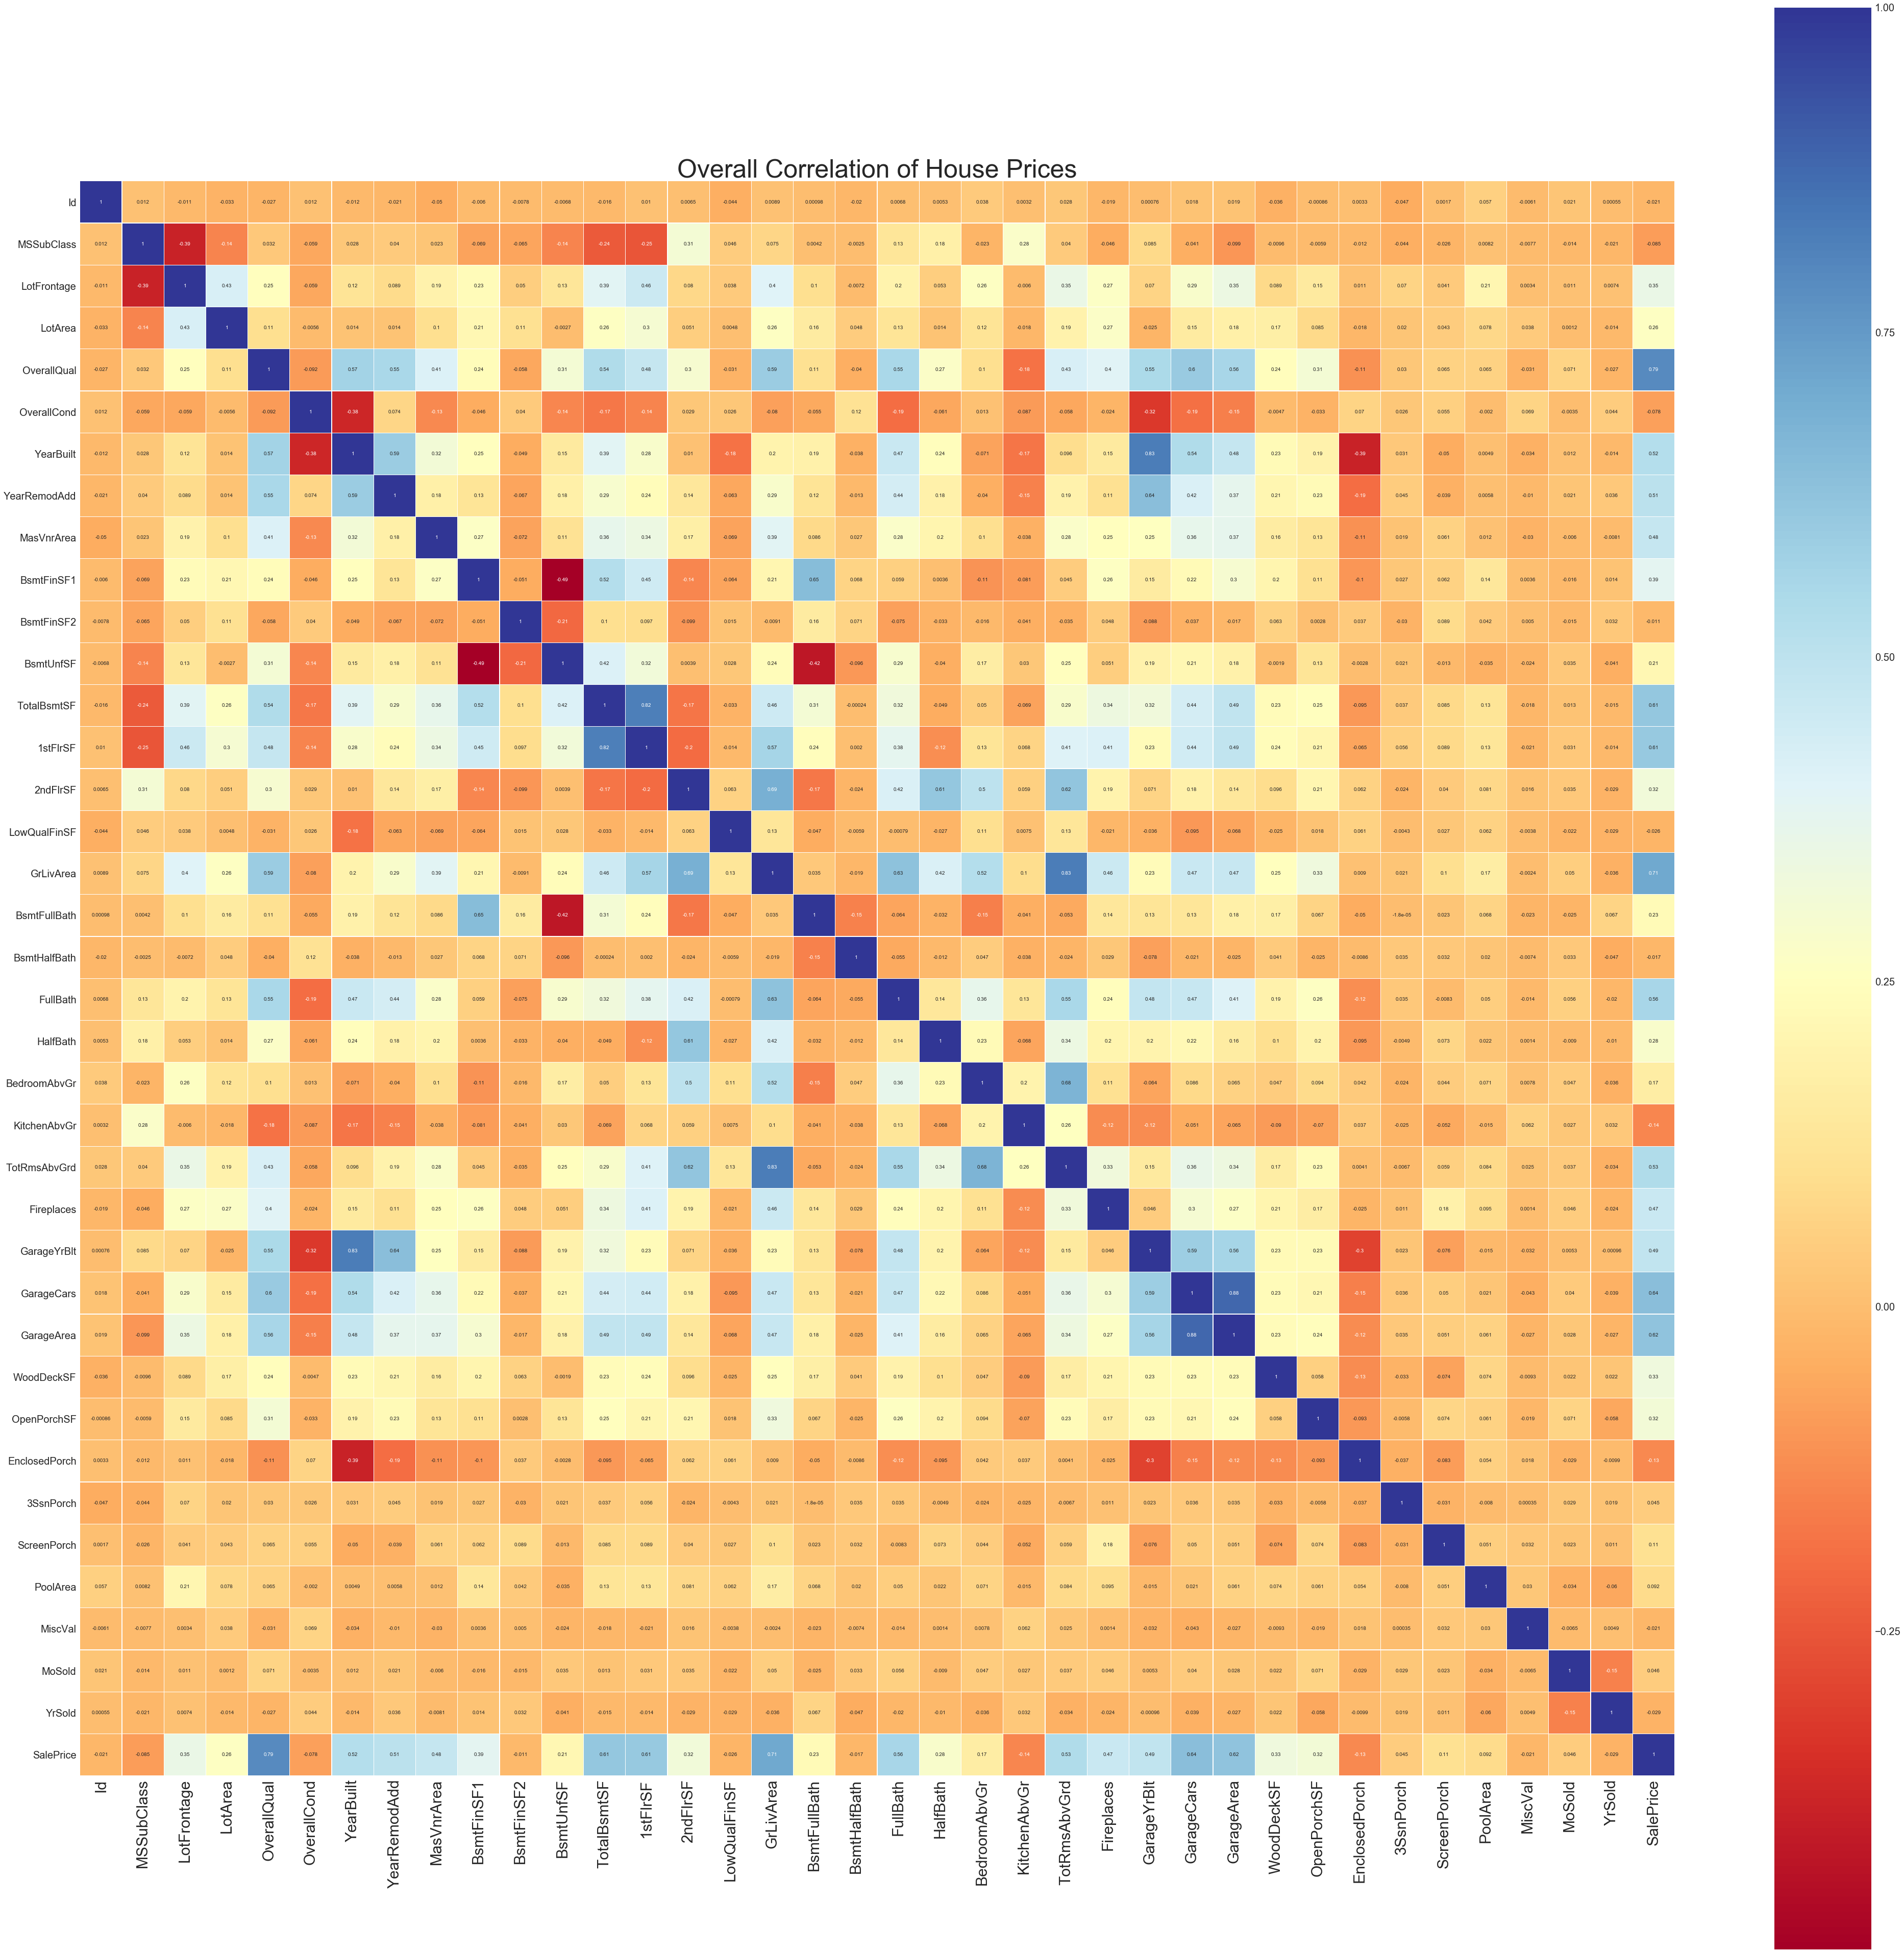

In [11]:
# We can use heatmap to get to know important variables
corr = trainset.corr()

plt.subplots(figsize = (70,70))
plt.title('Overall Correlation of House Prices', fontsize=50)
sns.heatmap(corr, annot = True, square = True, linewidths=0.2, cmap = 'RdYlBu')
plt.xticks(fontsize = 30);
plt.yticks(fontsize = 20);

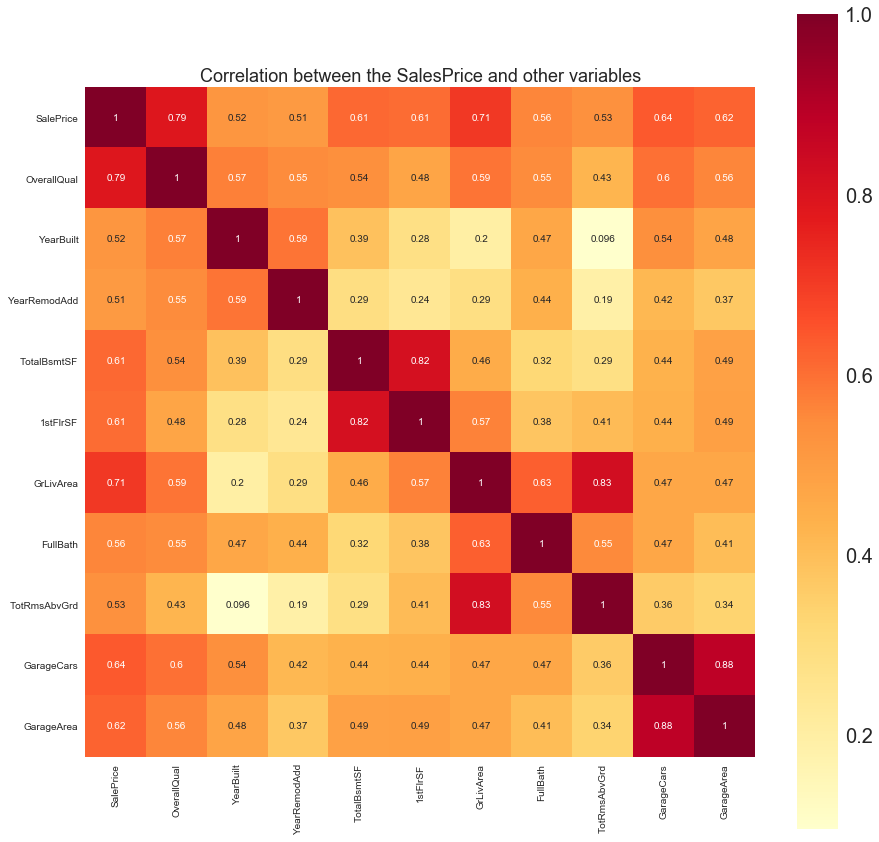

In [12]:
# We see that Sales price is highly related with OverallQual, YearBuilt, YearRemodAdd, Total BsmSF, 
# TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCar, GarageArea as the correlation is greater than 0.5
corr2 = trainset[['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea', 
                  'FullBath','TotRmsAbvGrd','GarageCars','GarageArea']].corr()

fig = plt.subplots(figsize = (15,15))
plt.title("Correlation between the SalesPrice and other variables", fontsize=18)
sns.heatmap(corr2, annot = True, square = True, cmap = "YlOrRd")
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);

In [13]:
trainset[['OverallQual', 'SalePrice']].groupby(['OverallQual'],
                        as_index = False).mean().sort_values(by = 'OverallQual', ascending = False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133488.053030
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\srisravana.p\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Sale Price')

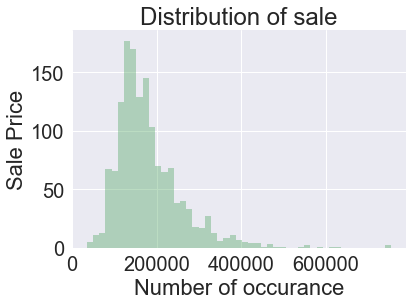

In [14]:
# Checking which numbers are frequently occuring
sns.distplot(trainset['SalePrice'], color = 'g', kde = False)
plt.title('Distribution of sale')
plt.xlabel('Number of occurance')
plt.ylabel('Sale Price')

Text(0,0.5,'Sale Price')

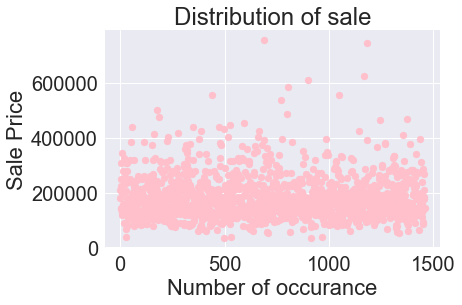

In [15]:
# Let's use scatter plot for better view
plt.scatter(range(trainset.shape[0]), trainset['SalePrice'].values, color = 'pink' )
plt.title('Distribution of sale')
plt.xlabel('Number of occurance')
plt.ylabel('Sale Price')

In [16]:
missing_columns = (trainset.isnull().sum())
print(missing_columns[missing_columns > 0])


LotFrontage      259
Alley           1368
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      689
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1452
Fence           1178
MiscFeature     1405
dtype: int64


In [17]:
#Forming the train set with only continuous variables

X_train = trainset.drop('SalePrice',axis=1)
X_train.index+=1
X_train = X_train.select_dtypes(exclude=['object'])
#print(X_train)***/

Y_train = trainset.SalePrice
Y_train.index+=1
#print(Y_train.value_counts())
print(Y_train.size)

X_test = testset.select_dtypes(exclude=['object'])

1459


In [18]:
#Imputing the missing value and keeping the columns 
imputed_X_train = X_train.copy()
imputed_X_test = X_test.copy()
imputed_X_test.index+=1
#print(imputed_X_test)
# Copying the orginal data,original data should not change(avoid it)
col_missing_val = (col for col in X_train.columns if X_train[col].isnull().any())
# Any column having missing values, it will be put into above variable
for col in col_missing_val:
    imputed_X_train[col] = imputed_X_train[col].isnull()
    imputed_X_test[col] = imputed_X_test[col].isnull()
#Imputer
from sklearn.preprocessing import Imputer
my_imputer =Imputer()
imputed_X_train = my_imputer.fit_transform(imputed_X_train)
imputed_X_test = my_imputer.transform(imputed_X_test)
print(imputed_X_train.shape)


(1459, 37)


In [19]:
# Predicting the model
from sklearn.metrics import mean_squared_error
print("Y_train",Y_train.size)
model = RandomForestRegressor()
model.fit(imputed_X_train,Y_train)

y_pred = model.predict(imputed_X_test)
print("Y_train",y_pred.shape)
mse = mean_squared_error(Y_train, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

Y_train 1459
Y_train (1459,)
11700570106.462248
108169.17354987163


In [22]:
submission = pd.DataFrame({'Id' : testset.Id, 'SalePrice' : y_pred})
submission.to_csv('House_Price_Submisson', index= False)
#print(submission)

In [21]:
score = rmsle_cv(rand_model, X_train, y_train)
print("Random Forest score: {:.4f}\n".format(score))

NameError: name 'rmsle_cv' is not defined